<a href="https://colab.research.google.com/github/AtishaySG25/Project_AIML/blob/Colab-Notebooks/Peak_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

<ipython-input-3-3027f6aba597>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Setup working directory and load data
DIR = '/content/drive/MyDrive/Colab Notebooks/Project'
FILENAME = 'Data/Sudarsan Sir-Acceleration data with g.csv'
os.chdir(DIR)
# Load gait data
df = pd.read_csv('Data/Sudarsan Sir-Acceleration data with g.csv')
df.head(15)

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.261751,-1.517924,9.684845,-0.026336,9.803112
1,0.263751,-1.520318,9.658509,-0.031125,9.777481
2,0.265751,-1.525106,9.660903,-0.021548,9.780565
3,0.267751,-1.529895,9.658509,-0.026336,9.778961
4,0.269751,-1.520318,9.658509,-0.035913,9.777498
5,0.271750,-1.510741,9.648932,-0.031125,9.766535
6,0.273750,-1.527501,9.639356,-0.033519,9.759691
7,0.275750,-1.513135,9.632173,-0.026336,9.750334
8,0.277750,-1.503559,9.615414,-0.014365,9.732270
9,0.279750,-1.491588,9.610625,-0.019154,9.725704


In [ ]:
from scipy .constants import g

In [ ]:
df['Acceleration y (m/s^2)'] = df['Acceleration y (m/s^2)'] - g
df

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.261751,-1.517924,-0.121805,-0.026336,9.803112
1,0.263751,-1.520318,-0.148141,-0.031125,9.777481
2,0.265751,-1.525106,-0.145747,-0.021548,9.780565
3,0.267751,-1.529895,-0.148141,-0.026336,9.778961
4,0.269751,-1.520318,-0.148141,-0.035913,9.777498
...,...,...,...,...,...
33231,66.724536,-2.353500,-2.726696,6.249166,9.732255
33232,66.726536,-2.308010,-2.609381,6.215647,9.785799
33233,66.728536,-2.274492,-2.504035,6.179734,9.833138
33234,66.730536,-2.257732,-2.415450,6.146215,9.874368


In [ ]:
start_index = 90
end_index = 100

df_subset = df.loc[start_index:end_index]

In [ ]:
start_index = 33135
end_index = 33235

df_subset = df.loc[start_index:end_index]

In [ ]:
start_index = 11035
end_index = 11285 #250

df_subset = df.loc[start_index:end_index]

In [ ]:
start_index = 5000
end_index = 30000

df_subset = df.loc[start_index:end_index]

In [ ]:
df_subset


,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
192,0.645745,-1.221043,-0.128987,-0.016759,9.754403
193,0.647745,-1.213860,-0.121805,-0.031125,9.760668
194,0.649746,-1.235408,-0.136170,-0.028730,9.749115
195,0.651746,-1.256956,-0.174477,-0.023942,9.713869
196,0.653746,-1.333570,-0.200813,-0.016759,9.697979
...,...,...,...,...,...
33194,66.650536,-0.725443,-3.361160,4.019865,7.630853
33195,66.652536,-0.746991,-3.365948,4.175488,7.712025
33196,66.654536,-0.914585,-3.358765,4.438850,7.881311
33197,66.656535,-1.048660,-3.353977,4.649539,8.022150


In [ ]:
print(df['Acceleration x (m/s^2)'])

0       -1.517924
1       -1.520318
2       -1.525106
3       -1.529895
4       -1.520318
           ...   
33231   -2.353500
33232   -2.308010
33233   -2.274492
33234   -2.257732
33235   -2.257732
Name: Acceleration x (m/s^2), Length: 33236, dtype: float64


In [ ]:
from matplotlib.legend import Shadow
# User-defined function for producing a component plot of a vector
def plotveccomp(x, name = ' ', axis = None, linewidth = 1, color = 'black', marker = ''):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, linewidth = linewidth, color = color, marker = marker)
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue',label='Mean')
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red',label='Z-Score')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  plt.legend(framealpha=1, frameon=True,bbox_to_anchor=(1.0, 1.0))
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('Acceleration (m/s^2)')
  ax1.set_title('Acceleration data(X-axis)')
  ax2.set_title('Acceleration data(Y-axis)')
  ax3.set_title('Acceleration data(Z-axis)')

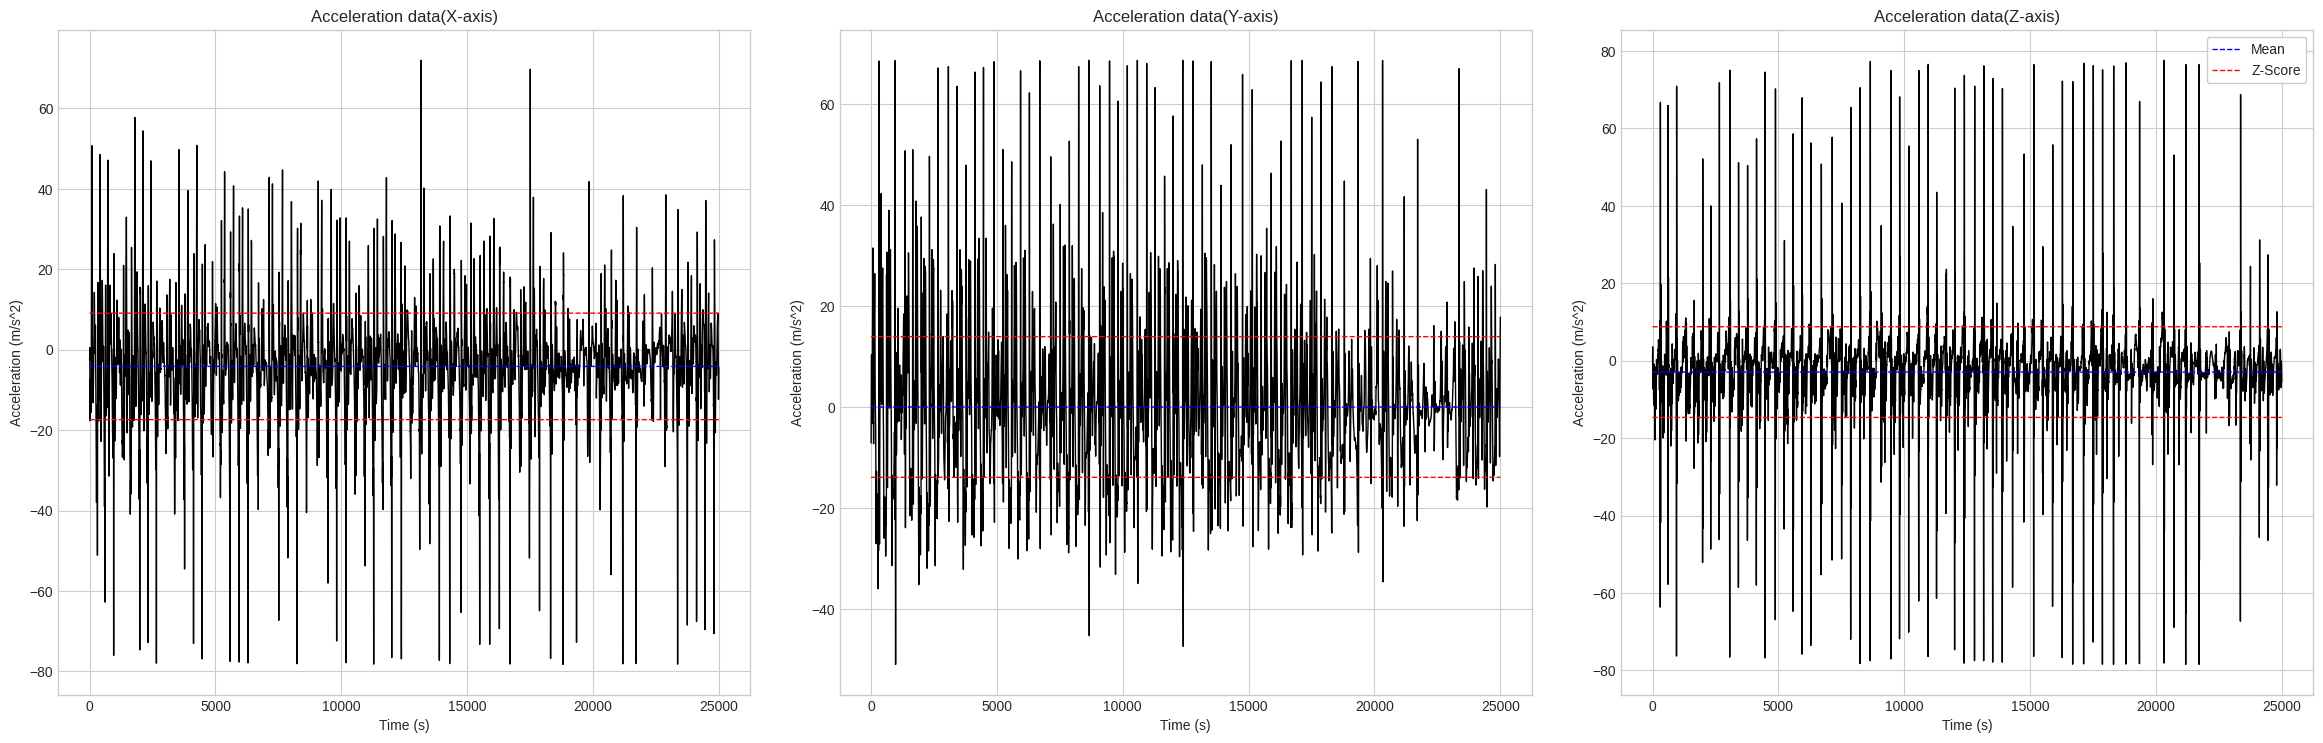

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (24,8))#24,5
fig.tight_layout(pad = 4.0)
plotveccomp(df_subset['Acceleration x (m/s^2)'], 'Acceleration X-axis', ax1)
plotveccomp(df_subset['Acceleration y (m/s^2)'], 'Acceleration Y-axis', ax2)
plotveccomp(df_subset['Acceleration z (m/s^2)'], 'Acceleration Z-axis', ax3)
plt.savefig('stdofvec.png')

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
from numpy.lib.stride_tricks import sliding_window_view

In [ ]:
data = np.array(df['Acceleration y (m/s^2)'])
window_size = 10
windows = sliding_window_view(data, window_shape=(window_size,), axis=0)
scaler = StandardScaler()
standardized_windows = np.apply_along_axis(lambda x: scaler.fit_transform(x.reshape(-1, 1)).flatten(), axis=1, arr=windows)
print(standardized_windows[:5])
moving_average = np.mean(windows, axis=-1)
print("Moving Averages:")
print(moving_average[:5])

[[ 1.77004842e+00  5.45498032e-01  6.56800657e-01  5.45498032e-01
   5.45498032e-01  1.00198954e-01 -3.45100170e-01 -6.79096623e-01
  -1.45834789e+00 -1.68099745e+00]
 [ 9.33844845e-01  1.04368631e+00  9.33844845e-01  9.33844845e-01
   4.94391552e-01  5.49382132e-02 -2.74673610e-01 -1.04369504e+00
  -1.26342171e+00 -1.81276025e+00]
 [ 1.22091921e+00  1.11919518e+00  1.11919518e+00  7.12218076e-01
   3.05240932e-01 -1.21326538e-05 -7.12201842e-01 -9.15690414e-01
  -1.42443209e+00 -1.42443209e+00]
 [ 1.38027502e+00  1.38027502e+00  9.80197632e-01  5.80120199e-01
   2.80042259e-01 -4.20073300e-01 -6.20112017e-01 -1.12022871e+00
  -1.12022871e+00 -1.32026739e+00]
 [ 1.62307109e+00  1.24779671e+00  8.72522295e-01  5.91047850e-01
  -6.56636673e-02 -2.53300875e-01 -7.22412568e-01 -7.22412568e-01
  -9.10049737e-01 -1.66059853e+00]]
Moving Averages:
[-0.15987247 -0.16849158 -0.17447713 -0.18118089 -0.18956063]


In [ ]:
data = np.array(df['Acceleration y (m/s^2)'])
window_size = 10
scaler = StandardScaler()
y_std = scaler.fit_transform(data.reshape(-1, 1))
std_dev_windows = sliding_window_view(y_std, window_shape=(window_size,), axis=0).std(axis=-1)
print("Standard Deviation for Sliding Windows:")
print(std_dev_windows[7000:7050])
moving_average_windows = sliding_window_view(y_std, window_shape=(window_size,), axis=0).mean(axis=-1)
print("Moving Average for Sliding Windows:")
print(moving_average_windows[:5])


Standard Deviation for Sliding Windows:
[[0.41097822]
 [0.46170614]
 [0.46158264]
 [0.40772856]
 [0.33882199]
 [0.30119551]
 [0.3309808 ]
 [0.5564688 ]
 [0.68793587]
 [0.76254529]
 [0.79102837]
 [0.76427444]
 [0.6932496 ]
 [0.60385388]
 [0.51961126]
 [0.3948477 ]
 [0.2660051 ]
 [0.28879016]
 [0.29242302]
 [0.27919925]
 [0.26300712]
 [0.23308724]
 [0.20305492]
 [0.17319388]
 [0.14766812]
 [0.11188319]
 [0.080506  ]
 [0.08318847]
 [0.09253012]
 [0.11382351]
 [0.13631504]
 [0.15667314]
 [0.18151894]
 [0.20794843]
 [0.22119585]
 [0.23468627]
 [0.24753379]
 [0.27992302]
 [0.29314965]
 [0.29973135]
 [0.29146593]
 [0.27194611]
 [0.24867928]
 [0.22363465]
 [0.18511335]
 [0.14822349]
 [0.11840308]
 [0.09966687]
 [0.07694473]
 [0.0624396 ]]
Moving Average for Sliding Windows:
[[-0.00074721]
 [-0.00144572]
 [-0.0019308 ]
 [-0.00247408]
 [-0.00315319]]


In [ ]:
sc = StandardScaler()

y = np.array(df['Acceleration y (m/s^2)']).reshape(-1, 1)

y_std = sc.fit_transform(y[0:5])
y_std
#print(y[0:200])

#np.std(y[])

array([[ 1.9919395 ],
       [-0.55587938],
       [-0.32430138],
       [-0.55587938],
       [-0.55587938]])

Text(0.5, 1.0, 'Acceleration Magnitude')

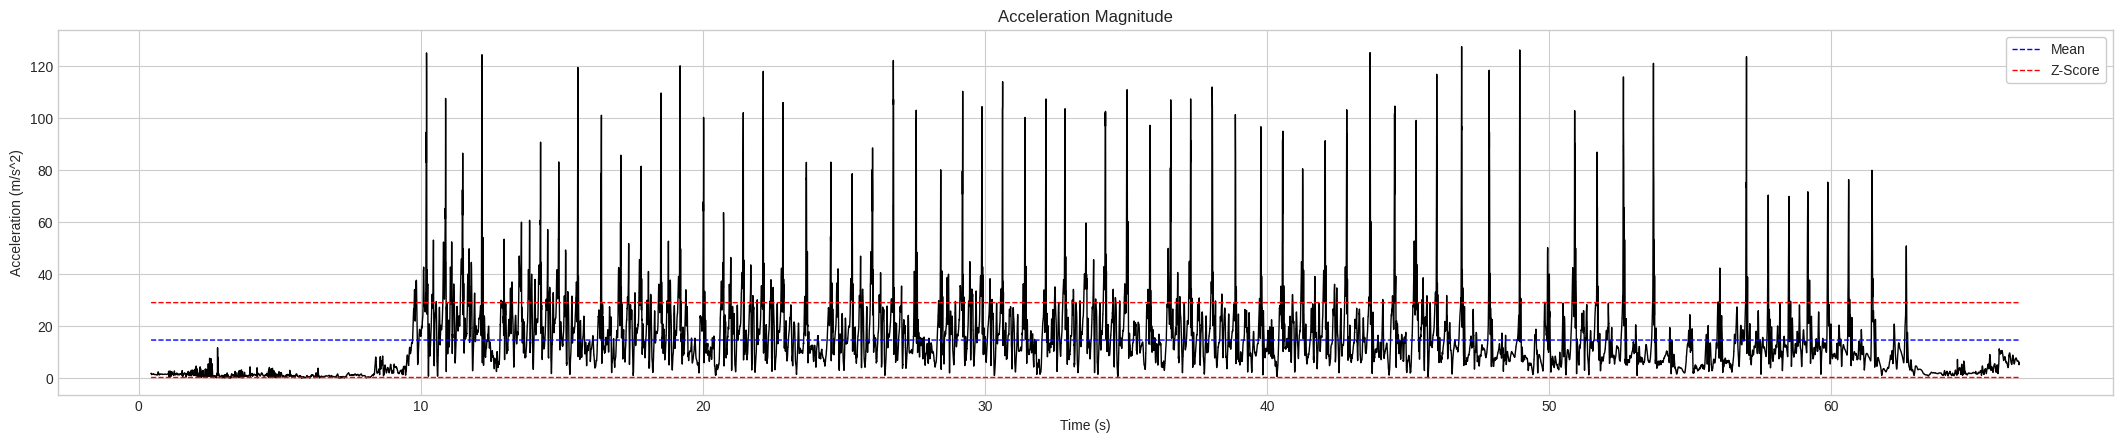

In [ ]:
a_mag = np.sqrt(df_subset['Acceleration x (m/s^2)']**2 + df_subset['Acceleration y (m/s^2)']**2 + df_subset['Acceleration z (m/s^2)']**2)
t = df_subset['Time (s)']
fig, ax = plt.subplots(1, 1, figsize = (22,5))
fig.tight_layout(pad = 4.0)
ax.plot(t, a_mag, linewidth = 1, color = 'black', marker = '')
ax.plot(t, [np.mean(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='blue',label='Mean')
ax.plot(t, [np.mean(a_mag) - np.std(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='red',label='Z-Score')
ax.plot(t, [np.mean(a_mag) + np.std(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='red')
plt.legend(framealpha=1, frameon=True,bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (m/s^2)')
ax.set_title('Acceleration Magnitude')

In [ ]:
#peak detection
import numpy as np
import pylab

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

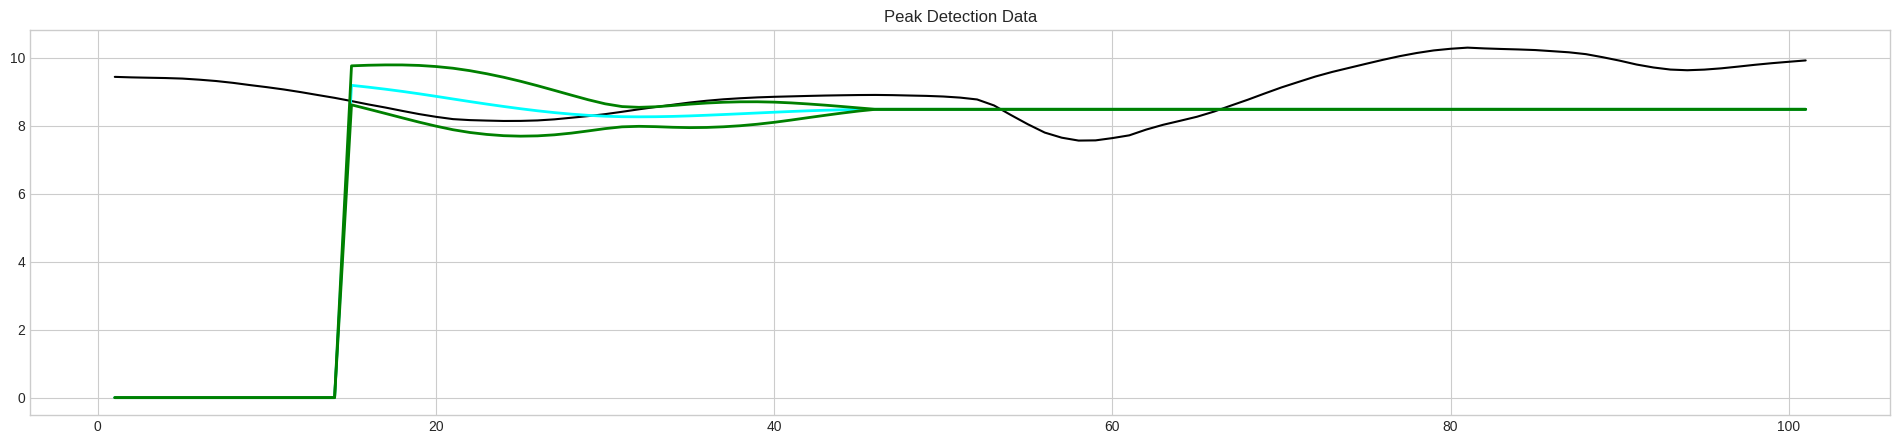

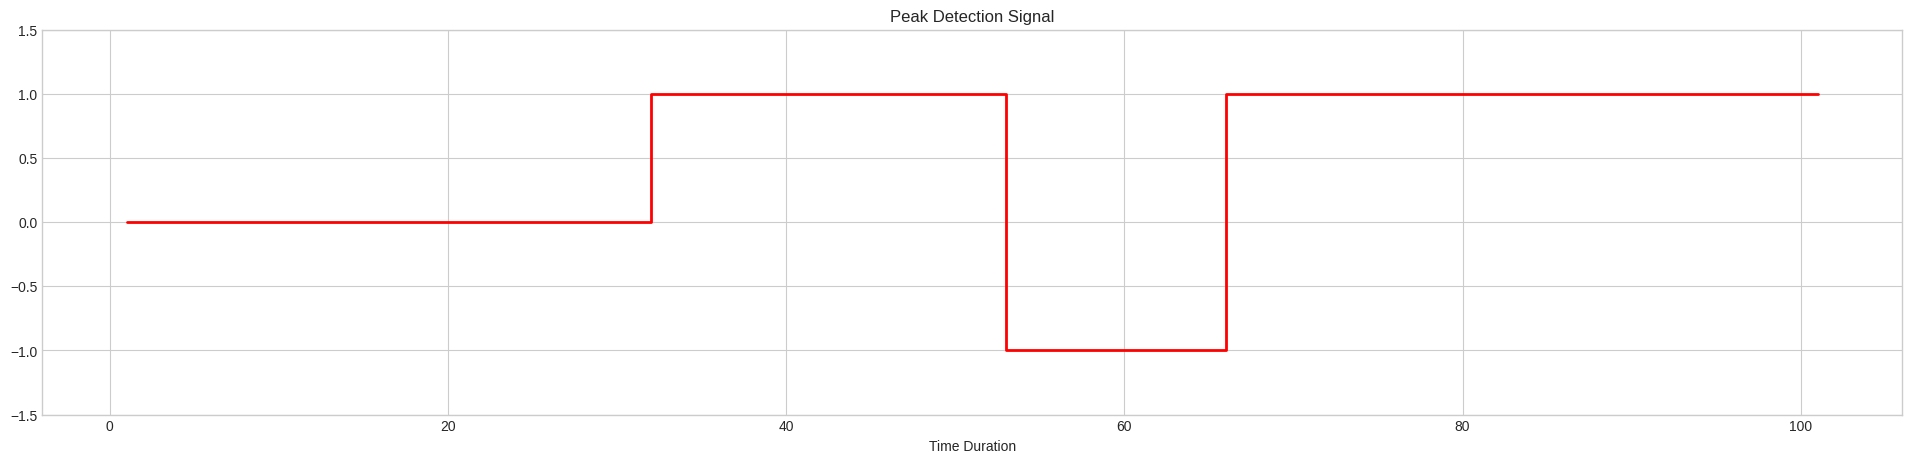

In [ ]:
# Data
y = np.array(a_mag)
#y = np.array([])

# Settings: lag = 30, threshold = 5, influence = 0 #5,3.5,0
lag =15
threshold =2.5
influence = 0

# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

# Plot result
fig, ax = plt.subplots(1,1, figsize = (24,5))
#pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), y,color = 'black')

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"], color="cyan", lw=2)

pylab.plot(np.arange(1, len(y)+1),
          result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)
ax.set_title('Peak Detection Data')

fig, ax = plt.subplots(1,1, figsize = (24,5))
#pylab.subplot(212)
pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
#plt.xlim(200 , 300)
pylab.ylim(-1.5,1.5)
ax.set_xlabel('Time Duration')
ax.set_title('Peak Detection Signal')#(1 second)
pylab.show()

In [ ]:
# Define values to select for each condition
choices = [True, True]  # True for rows that meet either condition
default = False  # False for rows that don't meet any condition

# Create a mask using np.select
mask = np.select([condition1, condition2], choices, default=default)

# Apply the mask to the DataFrame to crop it
cropped_df = df_subset[mask]

print(cropped_df)


ValueError: ignored

Detected Peaks and Outliers Indices: [ 2 17 21 25 31 33 40 48]


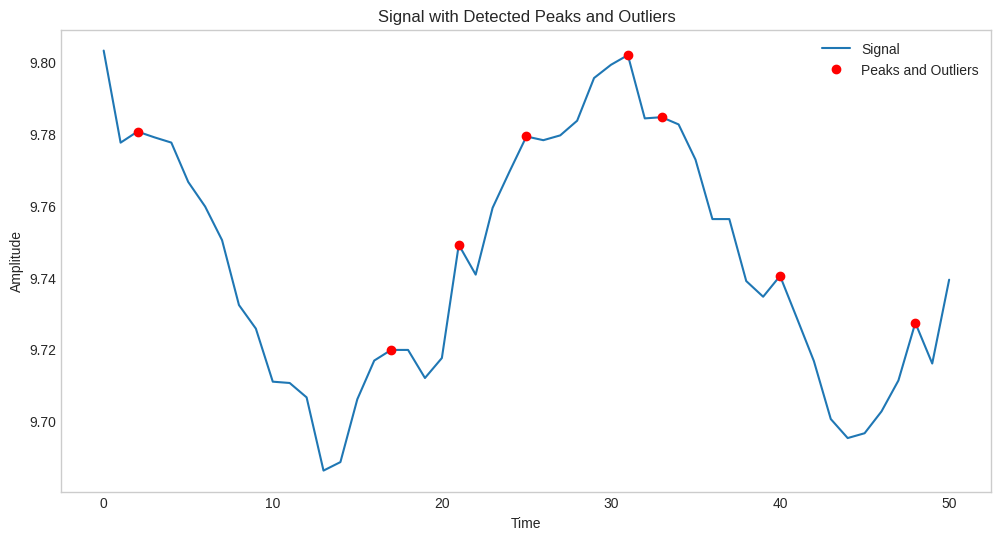

In [ ]:
import numpy as np
from scipy import signal
from scipy.stats import zscore

# Generate some example signal data with peaks
# Replace this with your own signal data
signal_data = np.array(a_mag)  # Example random signal

# Define a peak detection function
def detect_peaks(signal_data, threshold=3.0):
    # Smooth the signal (optional)
    smoothed_signal = signal.savgol_filter(signal_data, window_length=11, polyorder=3)

    # Calculate z-scores to identify outliers
    z_scores = zscore(smoothed_signal)

    # Define a threshold for outliers
    outliers = np.abs(z_scores) > threshold

    # Find the indices of the detected peaks
    peak_indices = signal.find_peaks(signal_data, height=threshold)[0]

    # Combine peak indices with outlier indices
    combined_indices = np.union1d(peak_indices, np.where(outliers)[0])

    return combined_indices

# Set the threshold for outlier detection
outlier_threshold = 3.0

# Detect peaks and outliers in the signal
peaks_and_outliers = detect_peaks(signal_data, threshold=outlier_threshold)

# Print the detected peak and outlier indices
print("Detected Peaks and Outliers Indices:", peaks_and_outliers)

# Plot the signal with detected peaks and outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(signal_data, label="Signal")
plt.plot(peaks_and_outliers, signal_data[peaks_and_outliers], 'ro', label="Peaks and Outliers")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal with Detected Peaks and Outliers")
plt.grid()
plt.show()
